In [49]:
##IMPORT
#import the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import itertools
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
ols = linear_model.LinearRegression()

#import the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
cleanedtrain = pd.read_csv('cleanedtrain.csv')
cleanedtest = pd.read_csv('cleanedtest.csv')
cleanedtrainylog = pd.read_csv('cleanedtrainwithYlog.csv')
try4 = pd.read_csv('try4.csv')
te4 = pd.read_csv('te4.csv')
try5 = pd.read_csv('try5.csv')
te5 = pd.read_csv('te5.csv')
pearson5 = pd.read_csv('pearson5.csv')
testpearson5 = pd.read_csv('testpearson5.csv')
try6 = pd.read_csv('try6.csv')
te6 = pd.read_csv('te6.csv')

In [58]:
liso = ['YearBuilt',
        'percent_grliving',
        'Percent_BsmtF',
        'YrRemMinBui',
        'YrSoldMinRem',
        'isNew',
'YearRemodAdd',
'Street_Pave',
'OverallCond',
'OverallQual',
'Condition2_PosA',
'Neighborhood_StoneBr',
'RoofMatl_WdShngl',
'Neighborhood_NridgHt',
'GarageCars',
'GrLivArea',
'Neighborhood_Crawfor',
'Functional_Typ',
'SaleType_New',
'Neighborhood_NoRidge',
'BsmtQual_No',
# '1stFlrSF',
'BsmtExposure_Gd',
'MSZoning_FV',
'Exterior1st_BrkFace',
'Heating_GasW',
# 'BsmtFullBath',
'Condition1_Norm',
'Fireplaces',
'Exterior2nd_ImStucc',
# 'FullBath',
'SaleCondition_Normal',
'Neighborhood_Somerst',
# 'HalfBath',
'CentralAir_Y',
'RoofMatl_Membran',
'MasVnrType_Stone',
'MSZoning_RL',
'Heating_Wall',
'Exterior1st_VinylSd',
# 'TotalBsmtSF',
'LotArea',
'LotShape_IR2',
'Exterior2nd_Stucco',
'Neighborhood_ClearCr',
'Foundation_PConc',
'TotalSF',
'HouseStyle_SFoyer',
'PavedDrive_Y',
'PoolArea',
'BsmtCond_Po',
'BsmtFinType1_No',
'Electrical_FuseF',
'GarageType_BuiltIn',
'BsmtFinSF1',
'TotalBath',
# '2ndFlrSF',
# 'ScreenPorch',
'Exterior2nd_VinylSd',
'ExterCond_TA',
'HouseStyle_2Story',
'GarageType_Detchd',
'BsmtFinType1_GLQ',
# 'OpenPorchSF',
'BsmtFinType2_No',
'TotalPorchSF',
# 'WoodDeckSF',
'Foundation_Stone',
'Exterior1st_Stucco',
'HouseStyle_1.5Unf',
'Exterior2nd_CmentBd']

list2 = ['YearBuilt',
        'percent_grliving',
        'Percent_BsmtF',
        'YrRemMinBui',
        'YrSoldMinRem',
        'isNew',
'YearRemodAdd',
'Street_Pave',
'OverallCond',
'OverallQual',
# 'OverallQual'*'TotalSF',
# 'Neighborhood_StoneBr'*'OverallQual',
         'Neighborhood_StoneBr',
# 'Neighborhood_NridgHt'*'OverallQual',
         'Neighborhood_NridgHt',
'GarageCars',
'GrLivArea',
# 'Neighborhood_Crawfor'*'OverallQual',
         'Neighborhood_Crawfor',
'SaleType_New',
# 'Neighborhood_NoRidge'*'OverallQual',
         'Neighborhood_NoRidge',
'BsmtExposure_Gd',
'Exterior1st_BrkFace',
'Heating_GasW',
'Fireplaces',
'SaleCondition_Normal',
# 'Neighborhood_Somerst'*'OverallQual',
         'Neighborhood_Somerst',
'CentralAir_Y',
'MasVnrType_Stone',
'MSZoning_RL',
'Heating_Wall',
'LotArea',
'LotShape_IR2',
# 'Neighborhood_ClearCr'*'OverallQual',
         'Neighborhood_ClearCr',
'TotalSF',
'PavedDrive_Y',
'PoolArea',
'BsmtCond_Po',
'BsmtFinType1_No',
'GarageType_BuiltIn',
'BsmtFinSF1',
'TotalBath',
'ExterCond_TA',
'HouseStyle_2Story',
'GarageType_Detchd',
'BsmtFinType1_GLQ',
'BsmtFinType2_No',
'TotalPorchSF',
'HouseStyle_1.5Unf']

list3 = ['SaleType_New',
'Street_Pave',
'TotalSF',
'RoofMatl_WdShngl',
'Condition2_PosA',
'GrLivArea',
'BsmtQual_No',
'Functional_Typ',
'OverallQual',
'Exterior1st_BrkFace',
'Percent_BsmtF',
'BsmtExposure_Gd',
'SaleCondition_Normal',
'CentralAir_Y',
'Condition1_Norm',
'MSZoning_FV',
'OverallCond',
'GarageCars',
'SaleType_Con',
'MSZoning_RL',
'Condition1_PosN',
'TotalBath',
'Foundation_PConc',
'LotArea',
'GarageQual_Gd',
'MSZoning_RH',
'Fireplaces',
'LotConfig_CulDSac',
'Heating_GasW',
'Foundation_Stone',
'CrawforQual',
'MasVnrType_Stone',
'StoneBrQual',
'SaleType_ConLD',
'PavedDrive_Y',
'RoofStyle_Mansard',
'Electrical_FuseF',
'HouseStyle_1.5Unf',
'BsmtFinType1_GLQ',
'NridgHtQual',
'ExterCond_TA',
'Condition1_RRNn',
'NoRidgeQual',
'Neighborhood_ClearCr',
'RoofMatl_Membran',
'PoolArea',
'BrkSideQual',
'GarageType_BuiltIn',
'FireplaceQu_Gd',
'SaleType_Oth',
'Condition2_Norm',
'Exterior1st_MetalSd',
'SomerstSF',
'TotalPorchSF',
'BsmtCond_No',
'GarageArea',
'TotRmsAbvGrd',
'BsmtFinSF1',
'YearBuilt',
'BrkSideSF',
'BsmtCond_TA',
'VeenkerQual',
'LotShape_IR2',
'Exterior2nd_CmentBd',
'BsmtFinType1_No',
'MoSold',
'MSSubClass',
'MiscVal',
'NAmesQual',
'YrSoldMinRem',
'BsmtFinType1_LwQ',
'GilbertQual',
'Exterior2nd_HdBoard',
'Exterior2nd_Plywood',
'MitchelSF',
'LotConfig_Inside',
'MeadowVSF',
'BedroomAbvGr',
'FireplaceQu_No',
'NWAmesQual',
'BsmtFinType2_Rec',
'GarageQual_Fa',
'ExterCond_Fa',
'RoofStyle_Gable',
'Exterior1st_HdBoard',
'EdwardsQual',
'ExterQual_TA',
'BsmtFinType1_Rec',
'BsmtExposure_No',
'Neighborhood_OldTown',
'GarageType_CarPort',
'HeatingQC_Gd',
'Exterior1st_Wd Sdng',
'LotConfig_FR3',
'LotConfig_FR2',
'BsmtFinType2_BLQ',
'Condition2_RRAn',
'BsmtQual_Gd',
'RoofStyle_Gambrel',
'Functional_Mod',
'BsmtQual_TA',
'BldgType_Twnhs',
'Utilities_NoSeWa',
'KitchenQual_TA',
'HeatingQC_TA',
'KitchenQual_Gd',
'Heating_OthW',
'GarageCond_Fa',
'LandSlope_Sev',
'Neighborhood_IDOTRR',
'Condition1_RRAe',
'Foundation_Wood',
'KitchenAbvGr',
'Heating_Grav',
'Exterior1st_BrkComm',
'Functional_Maj2',
'Functional_Sev']

list4 = ['SaleType_New','TotalSF','Street_Pave','GrLivArea','BsmtQual_No','Functional_Typ','OverallQual','Percent_BsmtF','SaleCondition_Normal','CentralAir_Y','OverallCond','GarageCars','SaleType_Con','TotalBath','LotArea','GarageQual_Gd','Fireplaces','PavedDrive_Y','PoolArea','SaleType_New',
'Street_Pave',
'TotalSF',
'RoofMatl_WdShngl',
'Condition2_PosA',
'GrLivArea',
'BsmtQual_No',
'Functional_Typ',
'OverallQual',
'Exterior1st_BrkFace',
'Percent_BsmtF',
'BsmtExposure_Gd',
'SaleCondition_Normal',
'CentralAir_Y',
'Condition1_Norm',
'MSZoning_FV',
'OverallCond',
'GarageCars',
'SaleType_Con',
'MSZoning_RL',
'Condition1_PosN',
'TotalBath',
'Foundation_PConc',
'LotArea',
'GarageQual_Gd',
'MSZoning_RH',
'Fireplaces',
'LotConfig_CulDSac',
'Heating_GasW',
'Foundation_Stone',
'CrawforQual',
'MasVnrType_Stone',
'StoneBrQual',
'SaleType_ConLD',
'PavedDrive_Y',
'RoofStyle_Mansard',
'Electrical_FuseF',
'HouseStyle_1.5Unf',
'BsmtFinType1_GLQ',
'NridgHtQual',
'ExterCond_TA',
'Condition1_RRNn',
'NoRidgeQual',
'Neighborhood_ClearCr',
'RoofMatl_Membran',
'PoolArea',
'BrkSideQual',
'GarageType_BuiltIn',
'FireplaceQu_Gd',
'SaleType_Oth','SomerstSF','TotalPorchSF','YearBuilt','YrSoldMinRem','BsmtFinType1_LwQ','GilbertQual','MitchelSF','MeadowVSF','BedroomAbvGr','GarageQual_Fa','EdwardsQual','Neighborhood_OldTown','BldgType_Twnhs','KitchenQual_Gd']

In [59]:
#Create DataFrame with all the independant variables and betas
temp_df = try6.drop(['ylogSalePrice'], axis=1)
# temp_df = temp_df.astype(int)
#appending to an empty list, creating into an array then transposing
# ll = []
# for column in temp_df:
#     ll.append(list(temp_df[column]))
# lla = np.array(ll[1:])
# x_m = lla.T
# y_m = list(cleanedtrainylog['ylogSalePrice'])
# np.where(np.isnan(temp_df))
# temp_df.isna().sum()

In [52]:
# missing_test = te6.isna().sum()
# missing_test = missing_test[missing_test>0]
# missing_test_per = missing_test /te6.shape[0] *100
# t_m = pd.DataFrame([missing_test, missing_test_per], index = ['t', '%']).T
# t_m.sort_values(['%'], ascending = [False])

(array([  5.,   1.,   7.,  27., 114., 698., 522.,  71.,  10.,   1.]),
 array([-0.70787362, -0.58638526, -0.4648969 , -0.34340855, -0.22192019,
        -0.10043183,  0.02105653,  0.14254488,  0.26403324,  0.3855216 ,
         0.50700996]),
 <a list of 10 Patch objects>)

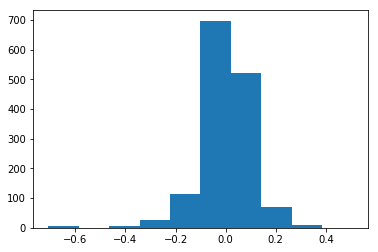

In [60]:
#Creating variables for the model.
tempfull = temp_df.iloc[:,1:]
temp = temp_df.loc[:,list4]
featuresfull = tempfull.copy()
features = temp.copy()
price   = try6['ylogSalePrice']

#LM and basic histogram to check normality and distribution
lm = LinearRegression()
lm.fit(features, price)
residuals = price - lm.predict(features)
plt.hist(residuals)
# temp.describe()

In [61]:
#Testing and creating csv for Kaggle
cleanedtestx = te6.loc[:,list4]
testresults = lm.predict(cleanedtestx)
testresults = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : testresults})
testresults['SalePrice'] = np.exp(testresults['SalePrice'])
# testresults
testresults.to_csv('MLRPredictions6.5.csv',index = False)

In [55]:
#Checking scores and betas
# print('R^2 is equal to %.3f' %(lm.score(features, price)))
# print('RSS is equal to %.3f' %(np.sum((price-lm.predict(features))**2)))
# print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))
te6.shape

(1459, 293)

In [56]:
# #positive and negative slopes if ever
# print('negative slope column names %s' %(features.columns[lm.coef_<0]))
# print('positive slope column names %s' %(features.columns[lm.coef_>0]))
try6.shape

(1456, 294)